In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
import os

import sklearn.metrics

In [3]:
DIR = 'D:/sanjeev/covid_cnn/'
SUBDIR_POS = 'CT_COVID/'
SUBDIR_NEG = 'CT_NonCOVID/'
print(f'Positive samples: {len(os.listdir(DIR + SUBDIR_POS))}.')
print(f'Negative samples: {len(os.listdir(DIR + SUBDIR_NEG))}.')

Positive samples: 349.
Negative samples: 397.


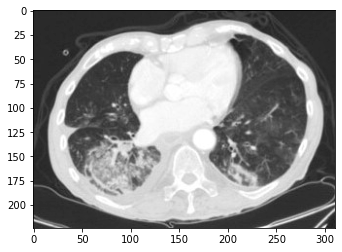

In [4]:
im = cv2.imread(r'D:\sanjeev\covid_19\CT_NonCOVID\0.jpg', 0) / 255
plt.imshow(im, cmap='gray', vmin=0, vmax=1) 
plt.show()

In [5]:
EPOCHS = 40
BATCH_SIZE = 64
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.001 / EPOCHS)
img_height, img_width = 248, 248
es = EarlyStopping(monitor='val_acc', mode='max',
                   verbose=1, 
                   patience=10, restore_best_weights=True)

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=5,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=0.05,
    zoom_range=0.05,
    validation_split=0.2) 

train_generator = train_datagen.flow_from_directory(
    DIR,
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='training') 

validation_generator = train_datagen.flow_from_directory(
    DIR, 
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale",
    subset='validation') 


Found 598 images belonging to 2 classes.
Found 148 images belonging to 2 classes.


In [12]:
dir1 = "D:/sanjeev/covid_cnn_test"

test_generator = train_datagen.flow_from_directory(
    dir1, 
    target_size=(img_height, img_width),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    color_mode="grayscale") 

Found 8 images belonging to 2 classes.


In [13]:
def create_model():
    model = Sequential([
        Conv2D(16, 1, padding='same', activation='relu', input_shape=(img_height, img_width, 1)),
        MaxPooling2D(),
        Conv2D(32, 3, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        Conv2D(64, 5, padding='same', activation='relu'),
        MaxPooling2D(),
        
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.4),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(8, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=OPTIMIZER,loss='binary_crossentropy',metrics=['accuracy', 'Precision', 'Recall'])
    
    return model

In [14]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 16)      32        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        51264     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 64)       0

In [15]:
hist = model.fit_generator(
        train_generator,
        steps_per_epoch = train_generator.samples // BATCH_SIZE,
        validation_data = validation_generator, 
        validation_steps = validation_generator.samples // BATCH_SIZE,
        epochs = EPOCHS)

C:\Users\User\AppData\Local\Temp/ipykernel_14588/205735069.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(


Epoch 1/40
9/9 [==============================] - 12s 1s/step - loss: 0.7046 - accuracy: 0.5037 - precision: 0.5364 - recall: 0.6345 - val_loss: 0.6928 - val_accuracy: 0.5312 - val_precision: 0.5312 - val_recall: 1.0000
Epoch 2/40
9/9 [==============================] - 10s 1s/step - loss: 0.6935 - accuracy: 0.5412 - precision: 0.5486 - recall: 0.6882 - val_loss: 0.6922 - val_accuracy: 0.5312 - val_precision: 0.5312 - val_recall: 1.0000
Epoch 3/40
9/9 [==============================] - 10s 1s/step - loss: 0.6924 - accuracy: 0.5169 - precision: 0.5385 - recall: 0.7073 - val_loss: 0.6920 - val_accuracy: 0.5156 - val_precision: 0.5156 - val_recall: 1.0000
Epoch 4/40
9/9 [==============================] - 11s 1s/step - loss: 0.6910 - accuracy: 0.5521 - precision: 0.5496 - recall: 0.8994 - val_loss: 0.6898 - val_accuracy: 0.5547 - val_precision: 0.5547 - val_recall: 1.0000
Epoch 5/40
9/9 [==============================] - 11s 1s/step - loss: 0.6907 - accuracy: 0.5393 - precision: 0.5446 - re

In [15]:
os.getcwd()

'C:\\Users\\User'

In [16]:
model.save("D:/sanjeev/covid_cnn/model.h5")

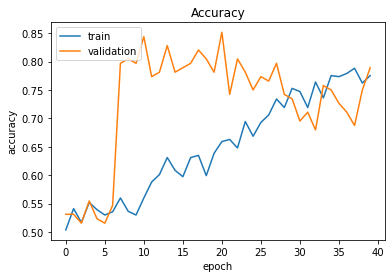

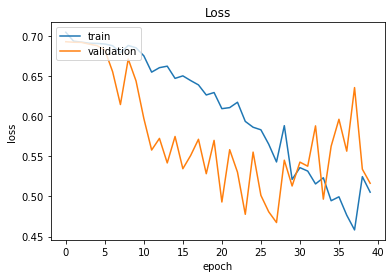

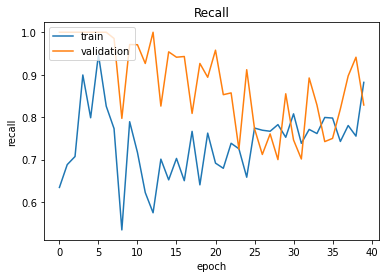

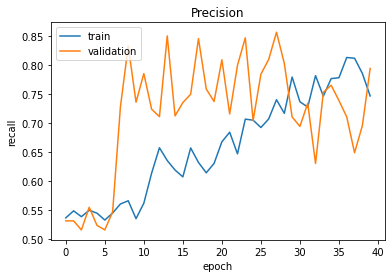

In [17]:
plt.title('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Recall')
plt.plot(hist.history['recall'])
plt.plot(hist.history['val_recall'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.title('Precision')
plt.plot(hist.history['precision'])
plt.plot(hist.history['val_precision'])
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
y_true = validation_generator.classes

for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):
    print(f'{name}: {value}')
    
print(f'F1 score: {sklearn.metrics.f1_score(y_true, y_pred)}')

C:\Users\User\AppData\Local\Temp/ipykernel_14588/4182330657.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = (model.predict_generator(validation_generator) > 0.5).astype(int)
C:\Users\User\AppData\Local\Temp/ipykernel_14588/4182330657.py:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  for name, value in zip(model.metrics_names, model.evaluate_generator(validation_generator)):


loss: 0.5700200200080872
accuracy: 0.7094594836235046
precision: 0.7195122241973877
recall: 0.746835470199585
F1 score: 0.6211180124223603


In [19]:
pd.DataFrame(sklearn.metrics.confusion_matrix(y_true, y_pred), 
             columns=['pred no covid', 'pred covid'], 
             index=['true no covid', 'true covid'])

,pred no covid,pred covid
true no covid,37,32
true covid,29,50


In [14]:
#testing the data

In [21]:
y_pred = (model.predict_generator(test_generator) > 0.5).astype(int)

C:\Users\User\AppData\Local\Temp/ipykernel_14588/4047512545.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = (model.predict_generator(test_generator) > 0.5).astype(int)


In [22]:
y_pred 

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]])